<a href="https://colab.research.google.com/github/DigitalGoldRush/DigitalGoldRush/blob/main/emotion_recognition_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
from tensorflow import keras
from keras import layers
from keras import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
RANDOM_SEED = 123


In [2]:
#Faster way to upload zip files from gdrive to colab
# ID of Kaggle emotional dataset
! gdown --id 1wrwLq6DqNHLDxU18RYUPY0WcV4ZNG70P

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1wrwLq6DqNHLDxU18RYUPY0WcV4ZNG70P
To: /content/emotional dataset.zip
100% 62.6M/62.6M [00:00<00:00, 87.1MB/s]


In [3]:
# zip file opener
!pip install patool
import patoolib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.4 MB/s 


In [4]:
patoolib.extract_archive('/content/emotional dataset.zip')

patool: Extracting /content/emotional dataset.zip ...
patool: running /usr/bin/7z x -o./Unpack_3yemu5a4 -- "/content/emotional dataset.zip"
patool: ... /content/emotional dataset.zip extracted to `emotional dataset' (multiple files in root).


'emotional dataset'

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [6]:
# data preparation
train_dir = '/content/emotional dataset/Training/Training'
test_dir = '/content/emotional dataset/Testing/Testing'

train_angry_dir = '/content/emotional dataset/Training/Training/Angry'
train_fear_dir = '/content/emotional dataset/Training/Training/Fear'
train_happy_dir = '/content/emotional dataset/Training/Training/Happy'
train_neutral_dir = '/content/emotional dataset/Training/Training/Neutral'
train_sad_dir = '/content/emotional dataset/Training/Training/Sad'
train_surprise_dir = '/content/emotional dataset/Training/Training/Suprise'

test_angry_dir = '/content/emotional dataset/Testing/Testing/Angry'
test_fear_dir = '/content/emotional dataset/Testing/Testing/Fear'
test_happy_dir = '/content/emotional dataset/Testing/Testing/Happy'
test_neural_dir = '/content/emotional dataset/Testing/Testing/Neutral'
test_sad_dir = '/content/emotional dataset/Testing/Testing/Sad'
test_surprise_dir = '/content/emotional dataset/Testing/Testing/Suprise'

dir_list = [train_angry_dir, train_fear_dir, train_happy_dir,
           train_neutral_dir, train_sad_dir, train_surprise_dir,
           test_angry_dir, test_fear_dir, test_happy_dir,
           test_neural_dir, test_sad_dir, test_surprise_dir]

for d in dir_list:
    print(d, len(os.listdir(d)))


/content/emotional dataset/Training/Training/Angry 3995
/content/emotional dataset/Training/Training/Fear 4097
/content/emotional dataset/Training/Training/Happy 7215
/content/emotional dataset/Training/Training/Neutral 4965
/content/emotional dataset/Training/Training/Sad 4830
/content/emotional dataset/Training/Training/Suprise 3171
/content/emotional dataset/Testing/Testing/Angry 958
/content/emotional dataset/Testing/Testing/Fear 1024
/content/emotional dataset/Testing/Testing/Happy 1774
/content/emotional dataset/Testing/Testing/Neutral 1233
/content/emotional dataset/Testing/Testing/Sad 1247
/content/emotional dataset/Testing/Testing/Suprise 831


In [7]:
# image generator

train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=64,
                                                   class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

validation_generator = validation_datagen.flow_from_directory(test_dir,
                                                             target_size=(150,150),
                                                             batch_size=62,
                                                             class_mode='categorical')

Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


In [8]:
# callback function
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                 restore_best_weights=True)

In [9]:
# build the model = RMS Optimizer, Relu Activation

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(6, activation='softmax')  
])

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()
# keras.utils.plot_model(model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [11]:
# train the model

fit_model = model.fit(train_generator,
                   epochs=10,
                   verbose=1,
                   validation_data=validation_generator,
                   callbacks=early_stopping_cb)


Epoch 1/10
442/442 [==============================] - 145s 327ms/step - loss: 1.6977 - accuracy: 0.2807 - val_loss: 1.6040 - val_accuracy: 0.3433
Epoch 2/10
442/442 [==============================] - 145s 329ms/step - loss: 1.6369 - accuracy: 0.3224 - val_loss: 1.5007 - val_accuracy: 0.4010
Epoch 3/10
442/442 [==============================] - 144s 326ms/step - loss: 1.5769 - accuracy: 0.3590 - val_loss: 1.4119 - val_accuracy: 0.4365
Epoch 4/10
442/442 [==============================] - 143s 324ms/step - loss: 1.5243 - accuracy: 0.3860 - val_loss: 1.3594 - val_accuracy: 0.4643
Epoch 5/10
442/442 [==============================] - 142s 322ms/step - loss: 1.4777 - accuracy: 0.4054 - val_loss: 1.3437 - val_accuracy: 0.4723
Epoch 6/10
442/442 [==============================] - 143s 324ms/step - loss: 1.4430 - accuracy: 0.4252 - val_loss: 1.2881 - val_accuracy: 0.4948
Epoch 7/10
442/442 [==============================] - 144s 325ms/step - loss: 1.4139 - accuracy: 0.4356 - val_loss: 1.2826 -

In [12]:
# Evaluate the model loss and accuracy metrics using the evaluate_generator method and the test generator
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

# Display the model's loss and accuracy results
print(f"Model Loss: {test_loss}, Model Accuracy: {test_acc}")


114/114 - 4s - loss: 1.2587 - accuracy: 0.5086 - 4s/epoch - 38ms/step
Model Loss: 1.2586877346038818, Model Accuracy: 0.5085608959197998


### model_adam = ADAM optimizer, Relu **Activation** 

In [31]:
# Build model_adam = ADAM optimizer, Relu Activation function

model_adam = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

from tensorflow.keras.optimizers import Adam

# Compile the model
model_adam.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_adam.summary()


    

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 64)      

In [32]:
# train the model_adam

model_adam_history = model_adam.fit(train_generator,
                   epochs=10,
                   verbose=1,
                   validation_data=validation_generator,
                   callbacks=early_stopping_cb)

Epoch 1/10
 15/442 [>.............................] - ETA: 2:15 - loss: 1.7875 - accuracy: 0.2094

KeyboardInterrupt: ignored

In [15]:
# Evaluate the model loss and accuracy metrics using the evaluate_generator method and the test generator
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
# Evaluate the model_adam loss and accuracy metrics using the evaluate_generator method and the test generator
test_loss, test_acc = model_adam.evaluate(validation_generator, verbose=2)

# Display the model's loss and accuracy results
print(f"Model_adam Loss: {test_loss}, Model_adam Accuracy: {test_acc}")


AttributeError: ignored

### model_swish = RMS Optimizer, Swish **Activation** 


In [16]:
# Build model_swish = RMS Optimizer, Swish Activation

model_swish = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='swish', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='swish'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# compile the model_swish
model_swish.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics = ['accuracy']) 
model_swish.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 64)      

In [17]:
# train the model_swish
model_swish = model_swish.fit(train_generator, epochs=10, verbose=1, validation_data=validation_generator, callbacks=early_stopping_cb)



Epoch 1/10
442/442 [==============================] - 143s 321ms/step - loss: 1.7608 - accuracy: 0.2557 - val_loss: 1.7021 - val_accuracy: 0.2864
Epoch 2/10
442/442 [==============================] - 143s 323ms/step - loss: 1.7038 - accuracy: 0.2817 - val_loss: 1.6870 - val_accuracy: 0.2895
Epoch 3/10
442/442 [==============================] - 143s 323ms/step - loss: 1.6679 - accuracy: 0.3092 - val_loss: 1.5558 - val_accuracy: 0.3607
Epoch 4/10
442/442 [==============================] - 143s 324ms/step - loss: 1.6318 - accuracy: 0.3334 - val_loss: 1.4964 - val_accuracy: 0.3963
Epoch 5/10
442/442 [==============================] - 142s 321ms/step - loss: 1.6068 - accuracy: 0.3436 - val_loss: 1.4735 - val_accuracy: 0.4099
Epoch 6/10
442/442 [==============================] - 142s 320ms/step - loss: 1.5739 - accuracy: 0.3609 - val_loss: 1.4329 - val_accuracy: 0.4348
Epoch 7/10
442/442 [==============================] - 142s 320ms/step - loss: 1.5478 - accuracy: 0.3751 - val_loss: 1.4122 -

In [18]:
# Evaluate the model_swish loss and accuracy metrics using the evaluate_generator method and the test generator
test_loss, test_acc = model_swish.evaluate(validation_generator, verbose=2)

# Display the model's loss and accuracy results
print(f"Model_swish Loss: {test_loss}, Model_swish Accuracy: {test_acc}")


AttributeError: ignored

In [19]:
# Build model_adam_swish = ADAM Optimizer, Swish Activation

model_adam_swish = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='swish', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='swish'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model_adam_swish.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics = ['accuracy'])
model_adam_swish.summary()
# keras.utils.plot_model(model_adam_swish)



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 64)      

In [20]:
# train the model_adam_swish
model_adam_swish = model_adam_swish.fit(train_generator, 
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=early_stopping_cb)



Epoch 1/10
442/442 [==============================] - 144s 325ms/step - loss: 1.7365 - accuracy: 0.2569 - val_loss: 1.6685 - val_accuracy: 0.3194
Epoch 2/10
442/442 [==============================] - 144s 325ms/step - loss: 1.7088 - accuracy: 0.2782 - val_loss: 1.7170 - val_accuracy: 0.2918
Epoch 3/10
442/442 [==============================] - 144s 327ms/step - loss: 1.6835 - accuracy: 0.2966 - val_loss: 1.5616 - val_accuracy: 0.3692
Epoch 4/10
442/442 [==============================] - 144s 325ms/step - loss: 1.6374 - accuracy: 0.3259 - val_loss: 1.4957 - val_accuracy: 0.4060
Epoch 5/10
402/442 [==========================>...] - ETA: 12s - loss: 1.6127 - accuracy: 0.3433

KeyboardInterrupt: ignored

In [ ]:
# Evaluate the model_adam_swish loss and accuracy metrics using the evaluate_generator method and the test generator

test_loss, test_acc = model_adam_swish.evaluate(validation_generator, verbose=2)
print(f"Model_adam_swish Loss: {test_loss}, Model_adam_swish Accuracy: {test_acc}")



### model_cnn_lstm = cnn + lstm **model** 

In [52]:
# Build model_cnn_lstm = cnn + lstm model
# cnn model for feature extraction
# lstm model for sequence classification

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.layers import Input
from keras.layers import TimeDistributed

# define cnn model
def define_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(6, activation='softmax'))

# compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# define lstm model
def define_lstm_model():
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(150, 150, 3)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(6, activation='softmax'))
  
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# define the hybrid model
def define_hybrid_model():
    # define CNN model
    cnn_model = define_cnn_model()
    # define LSTM model
    lstm_model = define_lstm_model()
    # define hybrid model
    model = Sequential()
    model.add(TimeDistributed(cnn_model, input_shape=(150, 150, 3)))
    model.add(TimeDistributed(lstm_model))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


Model_cnn_lstm = define_hybrid_model()
Model_cnn_lstm.summary()

#print(model.output_shape )


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


ValueError: ignored

In [ ]:
# train the model_cnn_lstm
 
model_cnn_lstm= model_cnn_lstm.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=early_stopping_cb)


In [ ]:
# Evaluate the model_cnn_lstm loss and accuracy metrics using the evaluate_generator method and the test generator

test_loss, test_acc = model_cnn_lstm.evaluate(validation_generator, verbose=2)
print(f"Model_cnn_lstm Loss: {test_loss}, Model_cnn_lstm Accuracy: {test_acc}")



### Plot Loss function of models

In [ ]:
# Plot the loss function for all the models

import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'], label='train')
plt.plot(model_adam.history.history['loss'])
plt.plot(model_swish.history.history['loss'])
plt.plot(model_adam_swish.history.history['loss'])
plt.plot(model_cnn_lstm.history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['model = (RMS Optimizer, Relu Activation)',
            'model_adam = ADAM optimizer, Relu Activation',
            'model_swish = RMS Optimizer, Swish Activation',
            'model_adam_swish = ADAM Optimizer, Swish Activation',
            'model_cnn_lstm = CNN + LSTM '],
            loc='upper left')



### Plot Accuracy function of models

In [ ]:
# Plot the accuracy function for all the models

import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'], label='train')
plt.plot(model_adam.history.history['accuracy'])
plt.plot(model_swish.history.history['accuracy'])
plt.plot(model_adam_swish.history.history['accuracy'])
plt.plot(model_cnn_lstm.history.history['accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['model = (RMS Optimizer, Relu Activation)',
            'model_adam = ADAM optimizer, Relu Activation',
            'model_swish = RMS Optimizer, Swish Activation',
            'model_adam_swish = ADAM Optimizer, Swish Activation',
            'model_cnn_lstm = CNN + LSTM '],
            loc='upper left')


### Confusion Matrix

In [ ]:
# Confusion Matrix
# model_adam

from sklearn.metrics import confusion_matrix
import seaborn as sns
    
y_pred = model_adam.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
 

In [ ]:
# Confusion Matrix
# model
from sklearn.metrics import confusion_matrix
import seaborn as sns
    
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
 


In [ ]:
# Confusion Matrix
# model_swish

from sklearn.metrics import confusion_matrix
import seaborn as sns
    
y_pred = model_swish.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
 


In [ ]:
# Confusion Matrix
# model_adam_swish

from sklearn.metrics import confusion_matrix
import seaborn as sns
    
y_pred = model_adam_swish.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
 

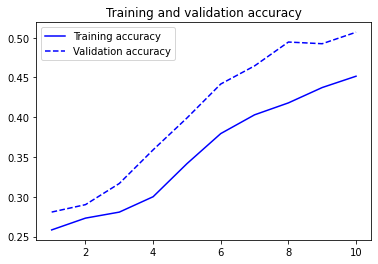

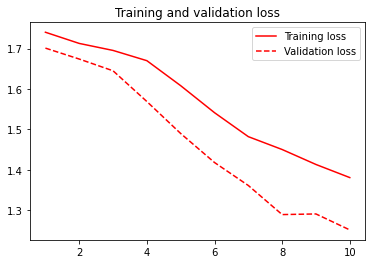

In [ ]:
# plot accuracy and loss

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# accuracy

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'b--', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# loss

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [49]:
model.save_weights('model_weights.h5')

In [50]:
model_json=model.to_json()
with open('model_json.json', 'w') as f: 
  f.write(model_json)

In [51]:

train_generator.class_indices

{'Angry': 0, 'Fear': 1, 'Happy': 2, 'Neutral': 3, 'Sad': 4, 'Suprise': 5}